# USAD

### Check original repo for their training results
https://github.com/manigalati/usad/blob/master/USAD.ipynb

## Environment

In [4]:
# !rm -r sample_data

In [5]:
# !git clone https://github.com/manigalati/usad

In [6]:
# %cd usad

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

from utils import *
from usad import *

In [5]:
!nvidia-smi -L

device = get_default_device()

GPU 0: Quadro P6000 (UUID: GPU-e16b9553-c966-4659-d528-7376969c0e91)
GPU 1: Quadro P6000 (UUID: GPU-def1ffb6-415d-a3f6-288b-94256f1ba88f)
GPU 2: GeForce GTX 1080 Ti (UUID: GPU-075162a2-c2cc-7757-e07d-e1260458102e)
GPU 3: GeForce GTX 1080 Ti (UUID: GPU-078c9ebd-10e3-2644-2267-bfcf3135c6a1)
GPU 4: GeForce GTX 1080 Ti (UUID: GPU-db4d0970-82a3-4f24-d69f-423377f7d3c0)
GPU 5: GeForce GTX 1080 Ti (UUID: GPU-945cc499-5f5f-ee9f-5b21-69a0e2e06535)
GPU 6: GeForce GTX 1080 Ti (UUID: GPU-07966339-f324-1615-decf-f4825e865008)
GPU 7: GeForce GTX 1080 Ti (UUID: GPU-dfa6e9f2-3de4-2115-3363-4329ff29ba3f)


## EDA - Data Pre-Processing

### Download dataset

In [16]:
!mkdir input

# downloaded data manually
'''#normal period
!python gdrivedl.py "https://drive.google.com/open?id=1rVJ5ry5GG-ZZi5yI4x9lICB8VhErXwCw" input/
#anomalies
!python gdrivedl.py "https://drive.google.com/open?id=1iDYc0OEmidN712fquOBRFjln90SbpaE7" input/'''
print()

mkdir: input: File exists



### Normal period

In [18]:
#Read data
normal = pd.read_csv("input/SWaT_Dataset_Normal_v1.csv")#, nrows=1000)
normal = normal.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
normal.shape

/var/folders/x6/jld4g_713tv_tqjyb44jml000000gn/T/ipykernel_31233/3202893291.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv("input/SWaT_Dataset_Normal_v1.csv")#, nrows=1000)


(495000, 51)

In [19]:
normal

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0,"124,3135",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
1,0,"124,392",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
2,0,"124,4705",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
3,0,"124,6668",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
4,0,"124,5098",1,1,1,"251,9226","8,313446","312,7916",0,1,...,0,1,1,"9,100231",0,"3,3485","0,0002563035",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494995,"2,460366","523,043",2,2,1,"262,0161","8,396437","328,5055","2,442316",2,...,"0,3086186",2,1,"250,8171","1,778105","189,8552","0,0001281517",1,1,1
494996,"2,448836","522,9645",2,2,1,"262,0161","8,396437","328,5055","2,442316",2,...,"0,3086186",2,1,"250,8171","1,778105","189,5027","0,0001281517",1,1,1
494997,"2,434744","522,886",2,2,1,"262,0161","8,396437","328,6337","2,444879",2,...,"0,3086186",2,1,"250,8171","1,778105","189,5027","0,0001281517",1,1,1
494998,"2,428338","522,9252",2,2,1,"262,0161","8,396437","328,6337","2,445391",2,...,"0,3086186",2,1,"250,8171","1,649953","189,5027","0,0001281517",1,1,1


In [20]:
# Transform all columns into float64
for i in list(normal): 
    normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))
normal = normal.astype(float)

#### Normalization

In [21]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [23]:
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


### Attack

In [24]:
#Read data
attack = pd.read_csv("input/SWaT_Dataset_Attack_v0.csv",sep=";")#, nrows=1000)
labels = [ float(label!= 'Normal' ) for label  in attack["Normal/Attack"].values]
attack = attack.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
attack.shape

/var/folders/x6/jld4g_713tv_tqjyb44jml000000gn/T/ipykernel_31233/12158840.py:2: DtypeWarning: Columns (1,9,28,46) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv("input/SWaT_Dataset_Attack_v0.csv",sep=";")#, nrows=1000)


(449919, 51)

In [25]:
# Transform all columns into float64
for i in list(attack):
    attack[i]=attack[i].apply(lambda x: str(x).replace("," , "."))
attack = attack.astype(float)

#### Normalization

In [26]:
from sklearn import preprocessing

x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

In [27]:
attack.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.884144,0.577133,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944116,0.000073,0.0,0.0,0.0
1,0.891145,0.577190,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944521,0.000073,0.0,0.0,0.0


### Windows

In [28]:
window_size=12

In [29]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(494988, 12, 51)

In [30]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(449907, 12, 51)

## Training

In [31]:
import torch.utils.data as data_utils

BATCH_SIZE =  7919
N_EPOCHS = 100
hidden_size = 100

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [32]:
history = training(N_EPOCHS,model,train_loader,val_loader)

Epoch [0], val_loss1: 0.0274, val_loss2: 0.0274
Epoch [1], val_loss1: 0.0286, val_loss2: -0.0028
Epoch [2], val_loss1: 0.0267, val_loss2: -0.0127
Epoch [3], val_loss1: 0.0337, val_loss2: -0.0248
Epoch [4], val_loss1: 0.0344, val_loss2: -0.0273
Epoch [5], val_loss1: 0.0344, val_loss2: -0.0302
Epoch [6], val_loss1: 0.0363, val_loss2: -0.0327
Epoch [7], val_loss1: 0.0363, val_loss2: -0.0334
Epoch [8], val_loss1: 0.0371, val_loss2: -0.0346
Epoch [9], val_loss1: 0.0375, val_loss2: -0.0345
Epoch [10], val_loss1: 0.0422, val_loss2: -0.0354
Epoch [11], val_loss1: 0.0373, val_loss2: -0.0323
Epoch [12], val_loss1: 0.0333, val_loss2: -0.0294
Epoch [13], val_loss1: 0.0397, val_loss2: -0.0366
Epoch [14], val_loss1: 0.0470, val_loss2: -0.0440
Epoch [15], val_loss1: 0.0469, val_loss2: -0.0443
Epoch [16], val_loss1: 0.0467, val_loss2: -0.0444
Epoch [17], val_loss1: 0.0469, val_loss2: -0.0451
Epoch [18], val_loss1: 0.0486, val_loss2: -0.0469
Epoch [19], val_loss1: 0.0481, val_loss2: -0.0465
Epoch [20],

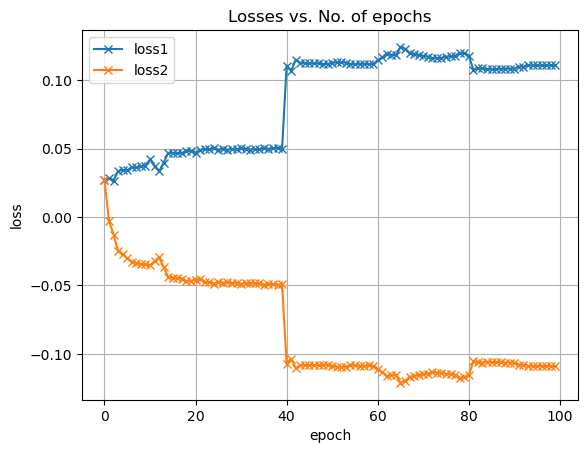

In [33]:
plot_history(history)

In [34]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_tmp.pth")

## Testing

In [35]:
checkpoint = torch.load("model_tmp.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [36]:
results=testing(model,test_loader)

In [37]:
windows_labels=[]
for i in range(len(labels)-window_size):
    windows_labels.append(list(np.int_(labels[i:i+window_size])))

In [38]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels ]

In [39]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

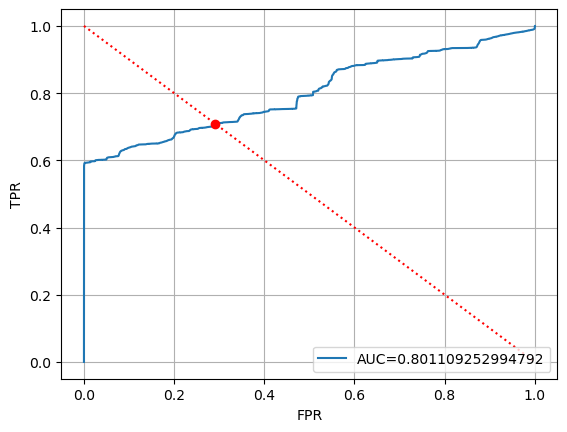

In [40]:
threshold=ROC(y_test,y_pred)

In [48]:
y_pred

array([0.07609831, 0.0761852 , 0.07629535, ..., 0.43471766, 0.43474033,
       0.43467855], dtype=float32)

In [50]:
y_pred_threshold = np.where(y_pred < 0.5, 0, 1)
print(y_pred_threshold)

[0 0 0 ... 0 0 0]


In [51]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_threshold)

0.7373641304347827

### Paper  F1-Score is 0.7917.
### Our reproduction is good enough. We can experiment with alpha and beta to get different results.